In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


#graphs

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('yelp_review.csv')

In [6]:
df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [7]:
#reading dataset with information about business(type)
data_business=pd.read_csv('yelp_business.csv')

In [8]:
data_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [9]:
business=data_business[data_business['categories'].str.match('Restaurant')].copy()

In [10]:
# merging reviews and businnes based on business_id
f1=pd.merge(df, business, on='business_id')

In [11]:
f1.head()

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
0,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,"""Tuck Shop""",...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
1,VrhTbFhgUa4zmx6jfqp_hQ,gKYaocnFD8Zi6rMt_mT-cw,VR6GpWIda3SfvPC-lg9H3w,5,2015-01-31,Highly recommend checking this place out! Tuc...,1,0,0,"""Tuck Shop""",...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
2,XMJ_sHKVrtqJZ4IXA0I9wA,Vp_C7oIxeztbd2PchNBOHw,VR6GpWIda3SfvPC-lg9H3w,4,2011-10-23,This restaurant is part of the wave of trendy ...,1,0,4,"""Tuck Shop""",...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
3,MhA0-xaUx4o4Pl_GQUr_ZQ,tB6vkXCS_8PIh-T9g8t6IQ,VR6GpWIda3SfvPC-lg9H3w,5,2011-07-22,"It's in a sketchy area, but it's upscale and l...",2,0,1,"""Tuck Shop""",...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
4,ziRcRyoy96J1Wj_WN-pM2Q,i1XAHltBpZC5zP5skcwVGw,VR6GpWIda3SfvPC-lg9H3w,4,2014-11-01,A local friend introduced me to this jewel res...,3,2,2,"""Tuck Shop""",...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian


Important features user_id, text, stars_x (rating from user)

In [12]:
review_df = f1[['user_id','name','stars_x', 'text','city', 'categories']]

In [13]:
review_df.shape

(897135, 6)

In [14]:
review_df.head()

,user_id,name,stars_x,text,city,categories
0,bv2nCi5Qv5vroFiqKGopiw,"""Tuck Shop""",5,Small unassuming place that changes their menu...,Montréal,Restaurants;Canadian (New);Italian
1,gKYaocnFD8Zi6rMt_mT-cw,"""Tuck Shop""",5,Highly recommend checking this place out! Tuc...,Montréal,Restaurants;Canadian (New);Italian
2,Vp_C7oIxeztbd2PchNBOHw,"""Tuck Shop""",4,This restaurant is part of the wave of trendy ...,Montréal,Restaurants;Canadian (New);Italian
3,tB6vkXCS_8PIh-T9g8t6IQ,"""Tuck Shop""",5,"It's in a sketchy area, but it's upscale and l...",Montréal,Restaurants;Canadian (New);Italian
4,i1XAHltBpZC5zP5skcwVGw,"""Tuck Shop""",4,A local friend introduced me to this jewel res...,Montréal,Restaurants;Canadian (New);Italian


In [15]:
type(review_df['categories'])

pandas.core.series.Series

In [16]:
#exporting csv
review_df.to_csv('example.csv')

In [17]:
#number of restaurant
len(review_df['name'].unique().tolist())

13819

In [18]:
#number of cities
len(review_df['city'].unique().tolist())

553

In [19]:
#number of comments per restaurant, restaurant chain increases number  of comments
review_df['name'].value_counts()

"MGM Grand Hotel"                            3445
"McDonald's"                                 3284
"Hash House A Go Go"                         3051
"SkinnyFATS"                                 2705
"Egg & I"                                    2594
"Pizzeria Bianco"                            2534
"Chipotle Mexican Grill"                     2519
"Yardbird Southern Table & Bar"              2361
"Rollin Smoke Barbeque"                      2320
"Oyster Bar"                                 2293
"Monta Ramen"                                2290
"In-N-Out Burger"                            2246
"Yama Sushi"                                 2242
"SUSHISAMBA - Las Vegas"                     2100
"Eat."                                       1940
"Pampas Churrascaria Brazilian Grille"       1909
"Red Robin Gourmet Burgers"                  1884
"Smashburger"                                1858
"Oregano's Pizza Bistro"                     1827
"Capriotti's Sandwich Shop"                  1802


In [57]:
#number of comments per city. 
review_df['city'].value_counts()

Las Vegas                  244973
Phoenix                     89916
Toronto                     88926
Scottsdale                  44855
Charlotte                   42736
Pittsburgh                  35664
Montréal                    28229
Tempe                       26410
Chandler                    23518
Henderson                   20776
Mesa                        18838
Cleveland                   17887
Gilbert                     14433
Madison                     14247
Glendale                    11832
Mississauga                 10647
Markham                      8873
Peoria                       7910
Edinburgh                    7243
North Las Vegas              7112
Stuttgart                    5541
Champaign                    5076
Richmond Hill                4886
Scarborough                  4248
North York                   3550
Goodyear                     3486
Surprise                     3425
Vaughan                      3060
Concord                      2973
Huntersville  

In [21]:
#selecting comments from Las Vegas
review_Vegas=review_df[review_df['city']=="Las Vegas"]

In [22]:
review_Vegas.shape

(244973, 6)

In [35]:
review_Vegas.head()

,user_id,name,stars_x,text,city,categories
4298,tL2pS5UOmN6aAOi3Z-qFGg,"""McDonald's""",3,I've stopped in here several times. It's alway...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4299,Tgo-NHUmzX8SeVad5_-vug,"""McDonald's""",5,Best customer service in town! Super polite te...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4300,vSzquh2Ym99tpksfpWH2kg,"""McDonald's""",1,I would give no stars if I could. Ordered a va...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4301,LnC93etRS5OZG-VDZHdSkw,"""McDonald's""",2,I know its just McDonalds not the White House ...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4302,2elkzAuFQdvCz0_K6MP4Dw,"""McDonald's""",5,We had an amazing experience here. It's very n...,Las Vegas,Restaurants;Fast Food;Food;Burgers


In [36]:
#exporting csv
review_Vegas.to_csv('Vegas.csv')

In [59]:
review_Vegas.head()

,user_id,name,stars_x,text,city,categories
4298,tL2pS5UOmN6aAOi3Z-qFGg,"""McDonald's""",3,I've stopped in here several times. It's alway...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4299,Tgo-NHUmzX8SeVad5_-vug,"""McDonald's""",5,Best customer service in town! Super polite te...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4300,vSzquh2Ym99tpksfpWH2kg,"""McDonald's""",1,I would give no stars if I could. Ordered a va...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4301,LnC93etRS5OZG-VDZHdSkw,"""McDonald's""",2,I know its just McDonalds not the White House ...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4302,2elkzAuFQdvCz0_K6MP4Dw,"""McDonald's""",5,We had an amazing experience here. It's very n...,Las Vegas,Restaurants;Fast Food;Food;Burgers


In [25]:
review_Vegas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244973 entries, 4298 to 897070
Data columns (total 6 columns):
user_id       244973 non-null object
name          244973 non-null object
stars_x       244973 non-null int64
text          244973 non-null object
city          244973 non-null object
categories    244973 non-null object
dtypes: int64(1), object(5)
memory usage: 13.1+ MB


In [37]:
review_Vegas['name'].value_counts()

"MGM Grand Hotel"                          3445
"Hash House A Go Go"                       3051
"SkinnyFATS"                               2705
"Egg & I"                                  2594
"Yardbird Southern Table & Bar"            2361
"Rollin Smoke Barbeque"                    2320
"Monta Ramen"                              2290
"Yama Sushi"                               2242
"Oyster Bar"                               2211
"SUSHISAMBA - Las Vegas"                   2100
"Eat."                                     1940
"Pampas Churrascaria Brazilian Grille"     1909
"In-N-Out Burger"                          1878
"Spice Market Buffet"                      1708
"LAVO Italian Restaurant & Lounge"         1474
"Border Grill"                             1434
"TAO Asian Bistro"                         1383
"Tacos El Gordo"                           1364
"Le Thai"                                  1355
"Hofbräuhaus Las Vegas"                    1336
"Hooters Casino Hotel Las Vegas"        

In [64]:
#What features can we extract from Categories?? no sure...
review_Vegas['categories'].str.split(';', expand=True).rename(columns=lambda x: f"string_{x+1}")

,string_1,string_2,string_3,string_4,string_5,string_6,string_7,string_8,string_9,string_10,string_11,string_12,string_13,string_14,string_15
4298,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4299,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4300,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4301,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4302,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4303,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4304,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4305,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4306,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None
4307,Restaurants,Fast Food,Food,Burgers,None,None,None,None,None,None,None,None,None,None,None


(array([28560.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 22257.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 32918.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 62808.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 98430.]),
 array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
        1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
        2.11111111, 2.22222222, 2.33333333, 2.44444444, 2.55555556,
        2.66666667, 2.77777778, 2.88888889, 3.        , 3.11111111,
        3.22222222, 3.33333333, 3.44444444, 3.55555556, 3.66666667,
        3.77777778, 3.88888889, 4.        , 4.11111111, 4.22222222,
        4.33333333, 4.44444444, 4.55555556, 4.66666667, 4.77777778,
        4.88888889, 5.        ]),
 <a list of 36 Patch objects>)

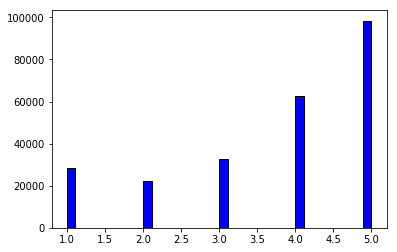

In [27]:
#rating distribution in Las Vegas
plt.hist(review_Vegas['stars_x'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

In [73]:
#removing quotation from feature name
review_Vegas.name=review_Vegas.name.apply(lambda x: x.replace('"',''))

C:\Users\John\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [74]:
review_Vegas.head()

,user_id,name,stars_x,text,city,categories
4298,tL2pS5UOmN6aAOi3Z-qFGg,McDonald's,3,I've stopped in here several times. It's alway...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4299,Tgo-NHUmzX8SeVad5_-vug,McDonald's,5,Best customer service in town! Super polite te...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4300,vSzquh2Ym99tpksfpWH2kg,McDonald's,1,I would give no stars if I could. Ordered a va...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4301,LnC93etRS5OZG-VDZHdSkw,McDonald's,2,I know its just McDonalds not the White House ...,Las Vegas,Restaurants;Fast Food;Food;Burgers
4302,2elkzAuFQdvCz0_K6MP4Dw,McDonald's,5,We had an amazing experience here. It's very n...,Las Vegas,Restaurants;Fast Food;Food;Burgers


In [75]:
#dataframe for most commented restaurant in Las Vegas
review_MGM=review_Vegas[review_Vegas['name']=="MGM Grand Hotel"]

In [76]:
#dataframe's size
review_MGM.shape

(3445, 6)

In [79]:
review_MGM.head(5)

,user_id,name,stars_x,text,city,categories
8936,tL2pS5UOmN6aAOi3Z-qFGg,MGM Grand Hotel,4,This is one huge casino. I've been in here man...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...
8937,3wB-JjsUjkvdNUDRnChsVg,MGM Grand Hotel,4,If you self park MGM gets off to a bad start. ...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...
8938,jierO7pbroyHWTjDDhMubQ,MGM Grand Hotel,4,The MGM Grand was my first experience staying ...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...
8939,CZs1Eq7t1fqpXV1yox-CVg,MGM Grand Hotel,5,They need no introduction! Unless of course o...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...
8940,SHJo1dtnlOIfndhBcon-xg,MGM Grand Hotel,5,I love Vegas! I try to stay and experience a d...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...


(array([758.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 496.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 708.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 973.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 510.]),
 array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
        1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
        2.11111111, 2.22222222, 2.33333333, 2.44444444, 2.55555556,
        2.66666667, 2.77777778, 2.88888889, 3.        , 3.11111111,
        3.22222222, 3.33333333, 3.44444444, 3.55555556, 3.66666667,
        3.77777778, 3.88888889, 4.        , 4.11111111, 4.22222222,
        4.33333333, 4.44444444, 4.55555556, 4.66666667, 4.77777778,
        4.88888889, 5.        ]),
 <a list of 36 Patch objects>)

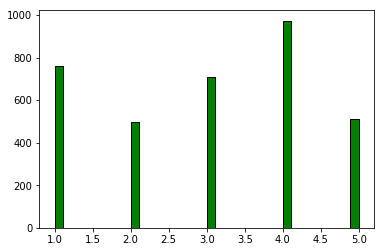

In [80]:
#distribution rating 
plt.hist(review_MGM['stars_x'], color = 'Green', edgecolor = 'black',
         bins = int(180/5))

In [81]:
#adding new column # words per comment
review_MGM['text length'] = review_MGM['text'].apply(len)
review_MGM.head()

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,name,stars_x,text,city,categories,text length
8936,tL2pS5UOmN6aAOi3Z-qFGg,MGM Grand Hotel,4,This is one huge casino. I've been in here man...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,229
8937,3wB-JjsUjkvdNUDRnChsVg,MGM Grand Hotel,4,If you self park MGM gets off to a bad start. ...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,1688
8938,jierO7pbroyHWTjDDhMubQ,MGM Grand Hotel,4,The MGM Grand was my first experience staying ...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,2025
8939,CZs1Eq7t1fqpXV1yox-CVg,MGM Grand Hotel,5,They need no introduction! Unless of course o...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,223
8940,SHJo1dtnlOIfndhBcon-xg,MGM Grand Hotel,5,I love Vegas! I try to stay and experience a d...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,1729


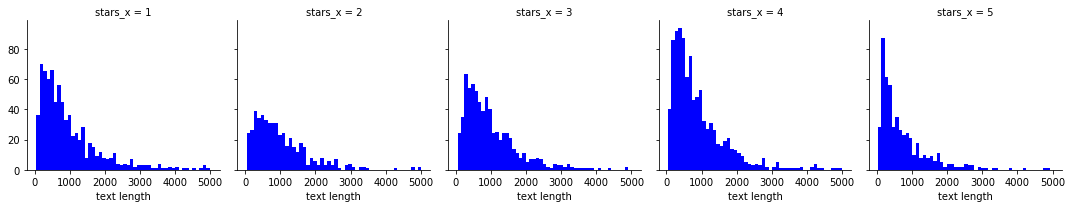

In [95]:
#correlation between # words and rating

graph = sns.FacetGrid(data=review_MGM,col='stars_x')
graph.map(plt.hist,'text length',bins=50,color='blue')

# Data Cleaning

In [113]:
review_arr =  review_MGM.as_matrix()

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [114]:
review_arr.shape

(3445, 7)

In [115]:
#creating an arrange same size of review_arr
clean_ar = np.empty(shape=(review_arr.shape), dtype=object)

In [117]:
type(clean_ar[0][3])

NoneType

In [119]:
#lower case, stopwords applied
def data_clean(arr, clean_ar):
    for i in range(len(arr)):
        sub_text =  re.sub("[^a-zA-Z]", " ", arr[i][3])
        l_case = sub_text.lower()
        words = l_case.split()
        stop = set(stopwords.words("english"))
        m_words = [wr for wr in words if not wr in stop]
        text = (" ".join(m_words))
        clean_ar[i][3] = text
        clean_ar[i][2] = arr[i][2]
        #adding lines
        clean_ar[i][0] = arr[i][0]
        clean_ar[i][1] = arr[i][1]
        clean_ar[i][4] = arr[i][4]
        clean_ar[i][5] = arr[i][5]
        clean_ar[i][6] = arr[i][6]
    
    return clean_ar

In [120]:
data = data_clean(review_arr, clean_ar)
clean_df = pd.DataFrame(data)

In [121]:
clean_df.head()

,0,1,2,3,4,5,6
0,tL2pS5UOmN6aAOi3Z-qFGg,MGM Grand Hotel,4,one huge casino many times years casino great ...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,229
1,3wB-JjsUjkvdNUDRnChsVg,MGM Grand Hotel,4,self park mgm gets bad start entrance parking ...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,1688
2,jierO7pbroyHWTjDDhMubQ,MGM Grand Hotel,4,mgm grand first experience staying las vegas s...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,2025
3,CZs1Eq7t1fqpXV1yox-CVg,MGM Grand Hotel,5,need introduction unless course one edc follow...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,223
4,SHJo1dtnlOIfndhBcon-xg,MGM Grand Hotel,5,love vegas try stay experience different hotel...,Las Vegas,Restaurants;Arts & Entertainment;Hotels;Event ...,1729


In [122]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Data columns (total 7 columns):
0    3445 non-null object
1    3445 non-null object
2    3445 non-null object
3    3445 non-null object
4    3445 non-null object
5    3445 non-null object
6    3445 non-null object
dtypes: object(7)
memory usage: 188.5+ KB


# Vectorization

In [123]:
vectorizer = TfidfVectorizer(norm = 'l2',min_df = 0, use_idf = True, smooth_idf = False, sublinear_tf = True, \
                             ngram_range=(1,2))


train_vect = vectorizer.fit_transform(clean_df.iloc[:,3])
train_vect = train_vect.toarray()
print (train_vect.shape)

(3445, 195266)


In [124]:
comp_vect = vectorizer.transform(clean_df.iloc[:,3])
comp_vect = comp_vect.toarray()
print (comp_vect.shape)

(3445, 195266)


In [125]:
#get cosine similarity
csr_sim = cosine_similarity(comp_vect,train_vect)

In [128]:
print(csr_sim)

[[1.         0.0056897  0.03588624 ... 0.00686123 0.01044342 0.00175394]
 [0.0056897  1.         0.03129263 ... 0.00899754 0.02166564 0.00986159]
 [0.03588624 0.03129263 1.         ... 0.00401372 0.01215026 0.00440754]
 ...
 [0.00686123 0.00899754 0.00401372 ... 1.         0.01438523 0.00495753]
 [0.01044342 0.02166564 0.01215026 ... 0.01438523 1.         0.01645421]
 [0.00175394 0.00986159 0.00440754 ... 0.00495753 0.01645421 1.        ]]
